# Ch.4 분류

### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Numpy는 [:5], pandas는 head

In [4]:
# data, target, target_names, DESCR
data = iris.data
label = iris.target
columns = iris.feature_names
df = pd.DataFrame(data, columns = columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = \
    train_test_split(data, label, test_size = 0.2,
                 shuffle=True, stratify=label, random_state=2019)

- 모델 객체 생성

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=1)

- 모델 학습

In [10]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

- 예측 (결과 확인)

In [11]:
y_pred = lr.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [13]:
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [14]:
lr.intercept_

array([  9.79503679,   2.02943481, -11.8244716 ])

In [15]:
y_pred_lr = lr.predict(x_test)

In [16]:
# 로지스틱 회귀 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [17]:
lr.coef_ #  Coefficient = Weight

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [18]:
lr.intercept_ # intercept = bias

array([  9.79503679,   2.02943481, -11.8244716 ])

In [6]:
## support Vector Machine
from sklearn.svm import SVC

In [7]:
sv = SVC()

In [10]:
sv.fit(X_train, y_train)
y_pred = sv.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dcl = DecisionTreeClassifier()

In [25]:
dcl.fit(X_train, y_train)
y_pred_dcl = dcl.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [27]:
### 결과값 비교
df = pd.DataFrame({'LR' : y_pred_lr, 'SVC' : y_pred_sv, 'DT' : y_pred_dcl, '정답' : y_test})

In [28]:
df

,LR,SVC,DT,정답
0,1,1,1,1
1,1,1,1,1
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

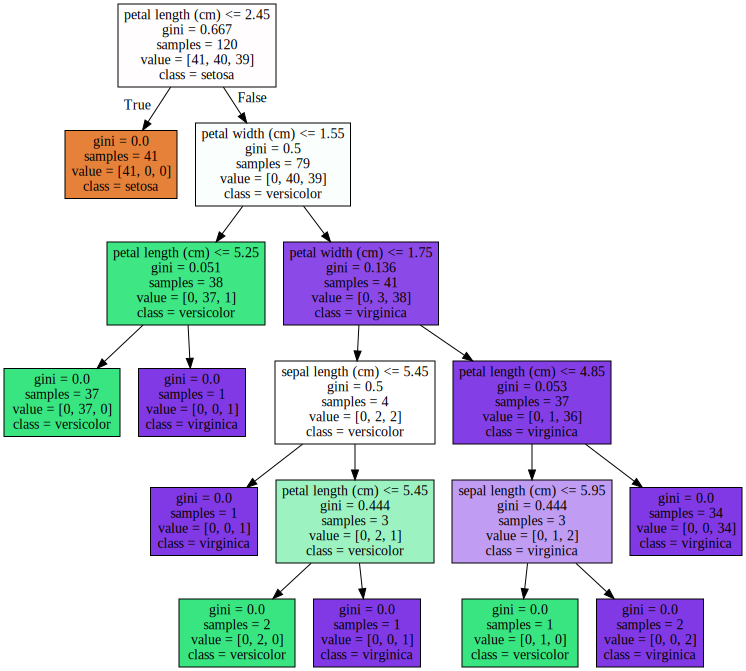

In [31]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 제약 조건
- max_depth = 3

In [32]:
dt_clf2 = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [33]:
export_graphviz(dt_clf2, out_file="tree2.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

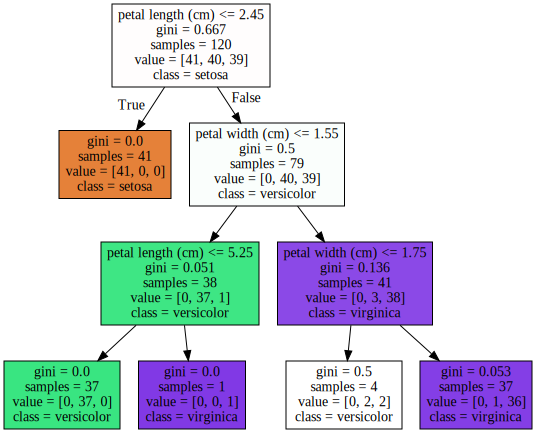

In [34]:
import graphviz
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [35]:
y_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [37]:
y_pred = dt_clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

- min_samples_split = 4 인 경우

In [41]:
dt_clf3 = DecisionTreeClassifier(max_depth = 4, random_state=156)
dt_clf3.fit(X_train, y_train)

0.9333333333333333
0.9333333333333333


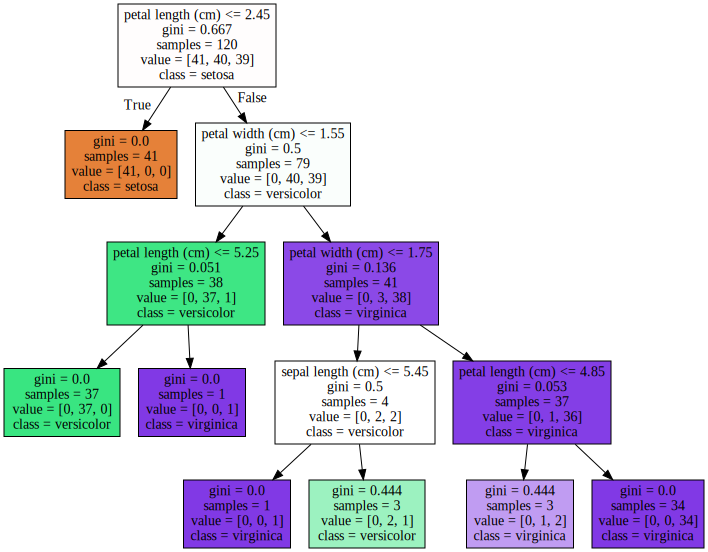

In [42]:
export_graphviz(dt_clf2, out_file="tree3.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [43]:
y_pred = dt_clf3.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333
0.9333333333333333


- min_samples_leaf = 4 인 경우

In [47]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf = 4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

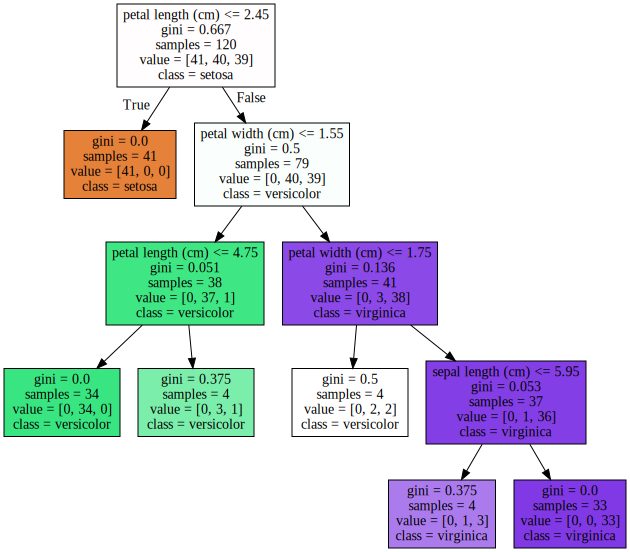

In [48]:
export_graphviz(dt_clf4, out_file="tree3.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)
import graphviz
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
y_pred = dt_clf4.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333
0.9333333333333333


## Feature 중요도

In [54]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [65]:
dt_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


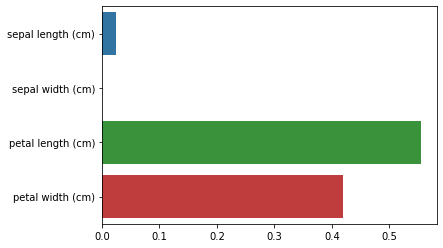

In [70]:
# feature 별 importance 매핑
import seaborn as sns
%matplotlib inline
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 앙상블 학습

In [76]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [80]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state=156)

#VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


In [81]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [83]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
#import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0, verbose = 1)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도 : {0:.4f}".format(gb_accuracy))
#print("GBM 수행 시간 : {0:.1f}".format(time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1       10340.3113            7.39m
         2        8582.2920            8.09m
         3        7283.1605            8.31m
         4        6276.5356            8.42m
         5        5457.5371            8.40m
         6        4785.1275            8.25m
         7        4227.2374            8.12m
         8        3736.9844            8.00m
         9        3350.6008            7.90m
        10        3000.1676            7.81m
        20        1220.7822            6.86m
        30         618.1201            5.98m
        40         378.4007            5.12m
        50         262.6745            4.26m
        60         190.7980            3.42m
        70         146.5356            2.56m
        80         116.6210            1.68m
        90          93.9275           49.77s
       100          77.9308            0.00s
GBM 정확도 : 0.9382


## 4.6 XGBoost(eXtra Gradient Boosting)

In [95]:
import xgboost
xgboost.__version__

'0.90'

In [104]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [106]:
print(dataset.target_names)

['malignant' 'benign']


In [108]:
print(cancer_df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [110]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state=156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [112]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [113]:
params={'max_depth':3,
       'eta':0.1,
       'objective':'binary:logistic',
       'eval_metric':'logloss',
       'early_stoppings':100
       }
num_rounds = 400

In [115]:
# train 데이터 세트는 'train, evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds,\
                     early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

In [118]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값 10개 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측 값 10개만 표시', preds[:10])

predict() 수행 결과값 10개 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측 값 10개만 표시 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},'.format(accuracy, precision, recall))

In [126]:
get_clf_eval(y_test, preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율:0.9870,


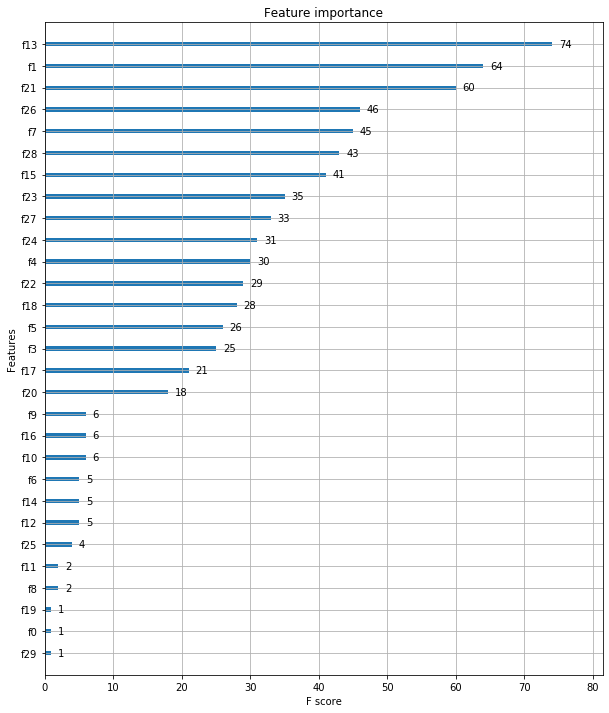

In [127]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10 ,12))
plot_importance(xgb_model, ax=ax)